Saving Cleaned.csv to Cleaned (1).csv
Descriptive Statistics:
                          Country        City     AQI Value  AQI Category  \
count                      12505       12741  1.274200e+04  12742.000000   
unique                       151       12741           NaN           NaN   
top     United States of America  Praskoveya           NaN           NaN   
freq                        1406           1           NaN           NaN   
mean                         NaN         NaN -1.672915e-16      0.442238   
std                          NaN         NaN  1.000039e+00      0.499194   
min                          NaN         NaN -2.756954e+00      0.000000   
25%                          NaN         NaN -7.441966e-01      0.000000   
50%                          NaN         NaN -9.492013e-02      0.000000   
75%                          NaN         NaN  6.192840e-01      1.000000   
max                          NaN         NaN  3.281318e+00      2.000000   

        CO AQI Value  CO

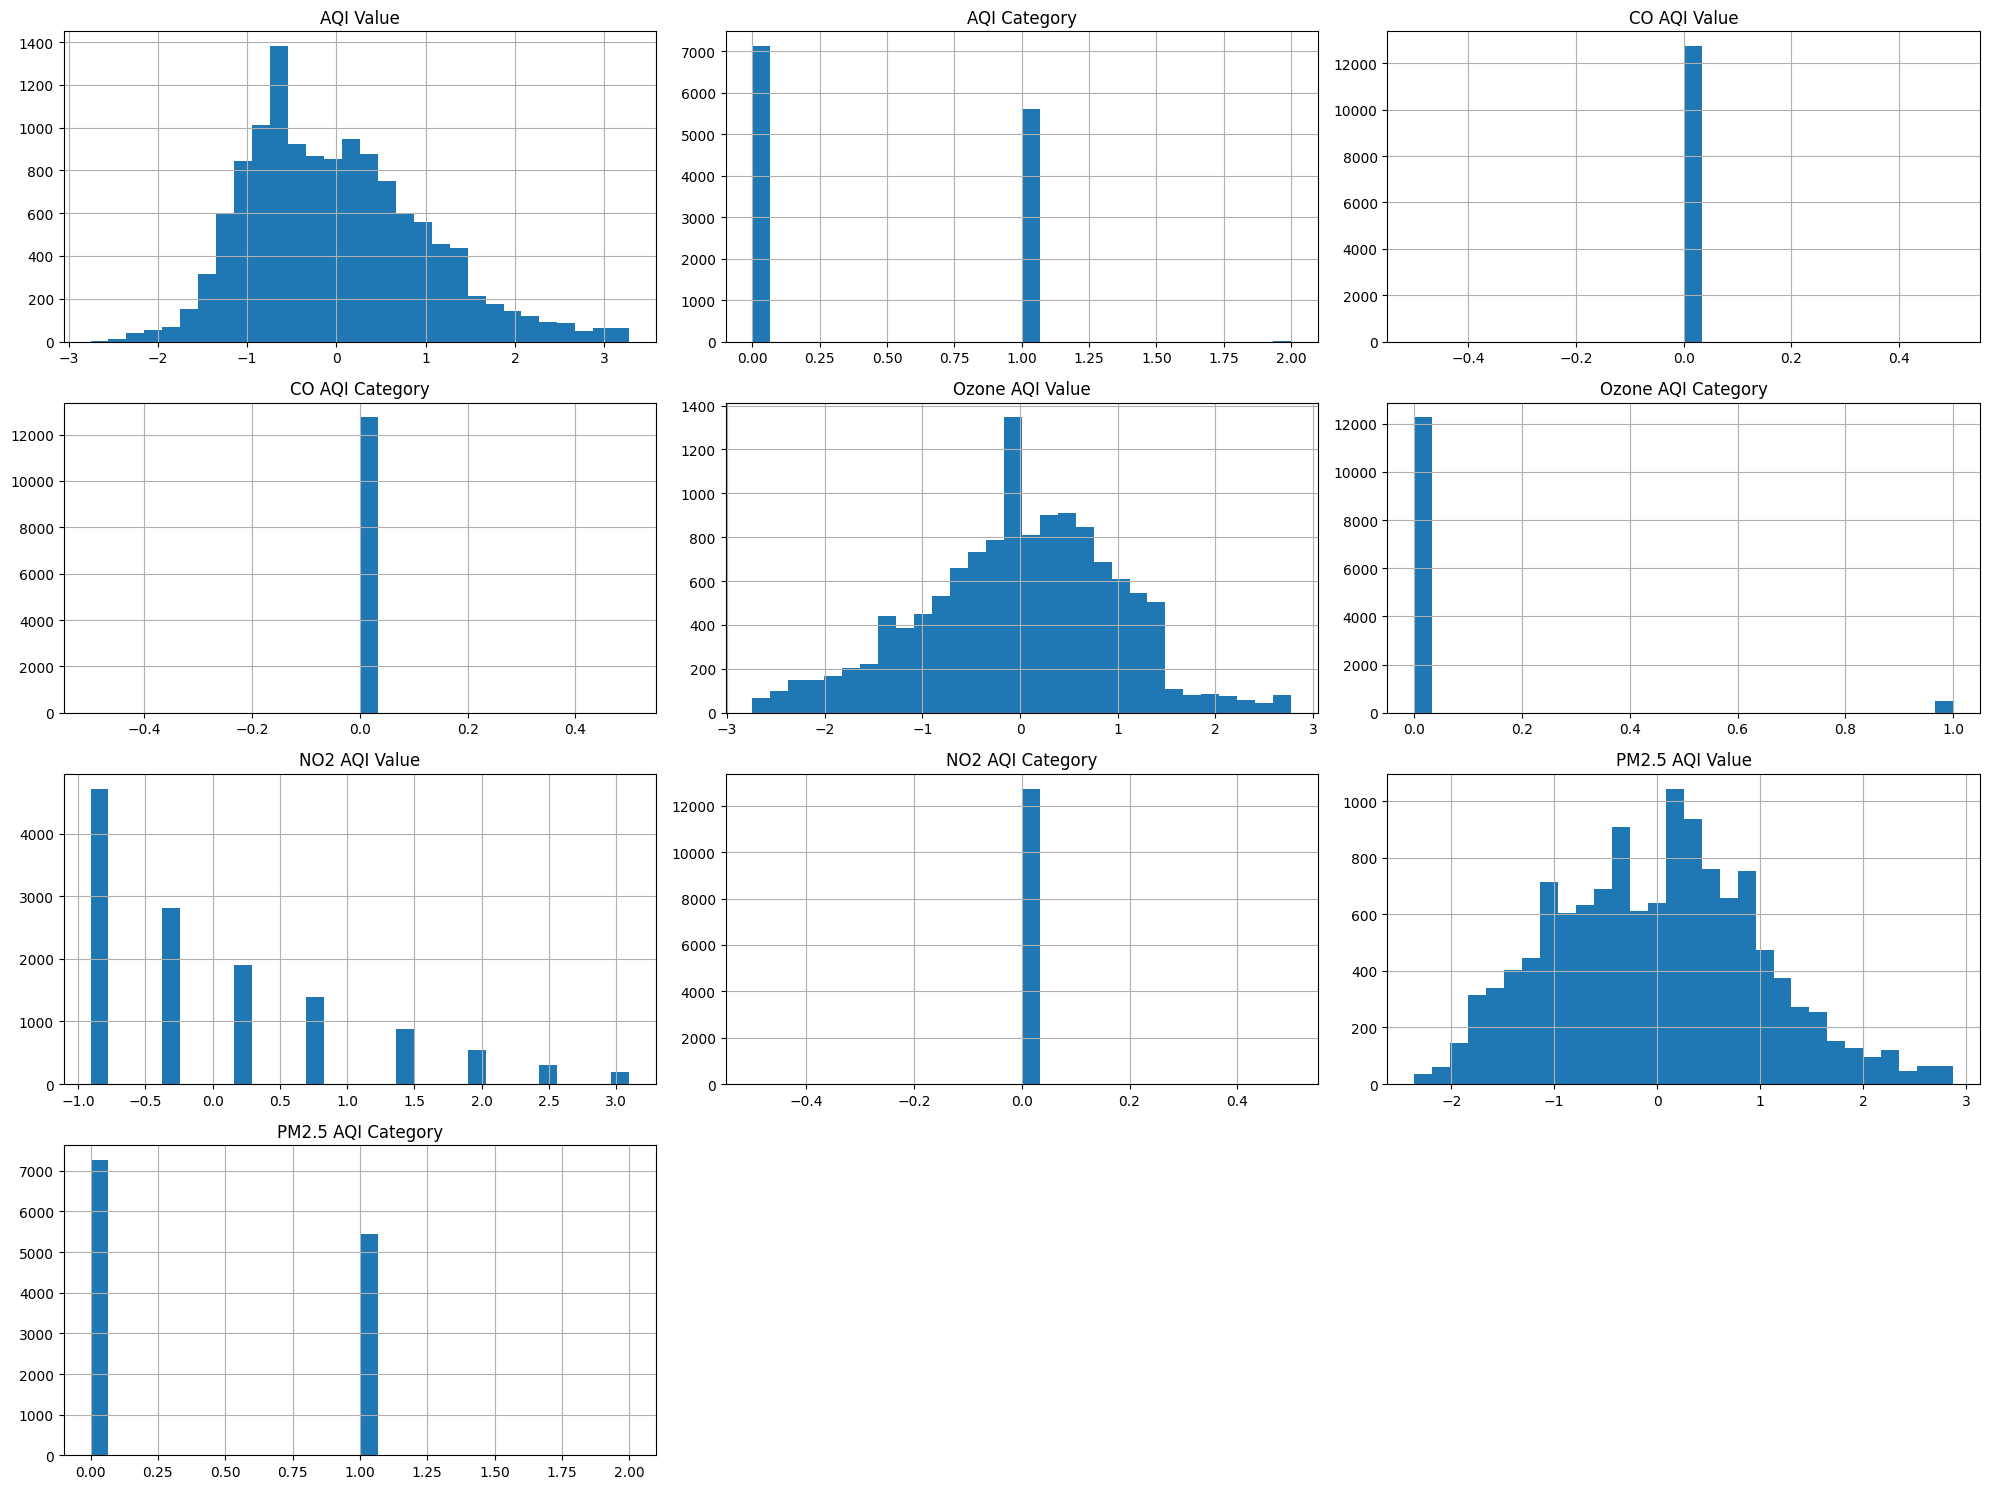

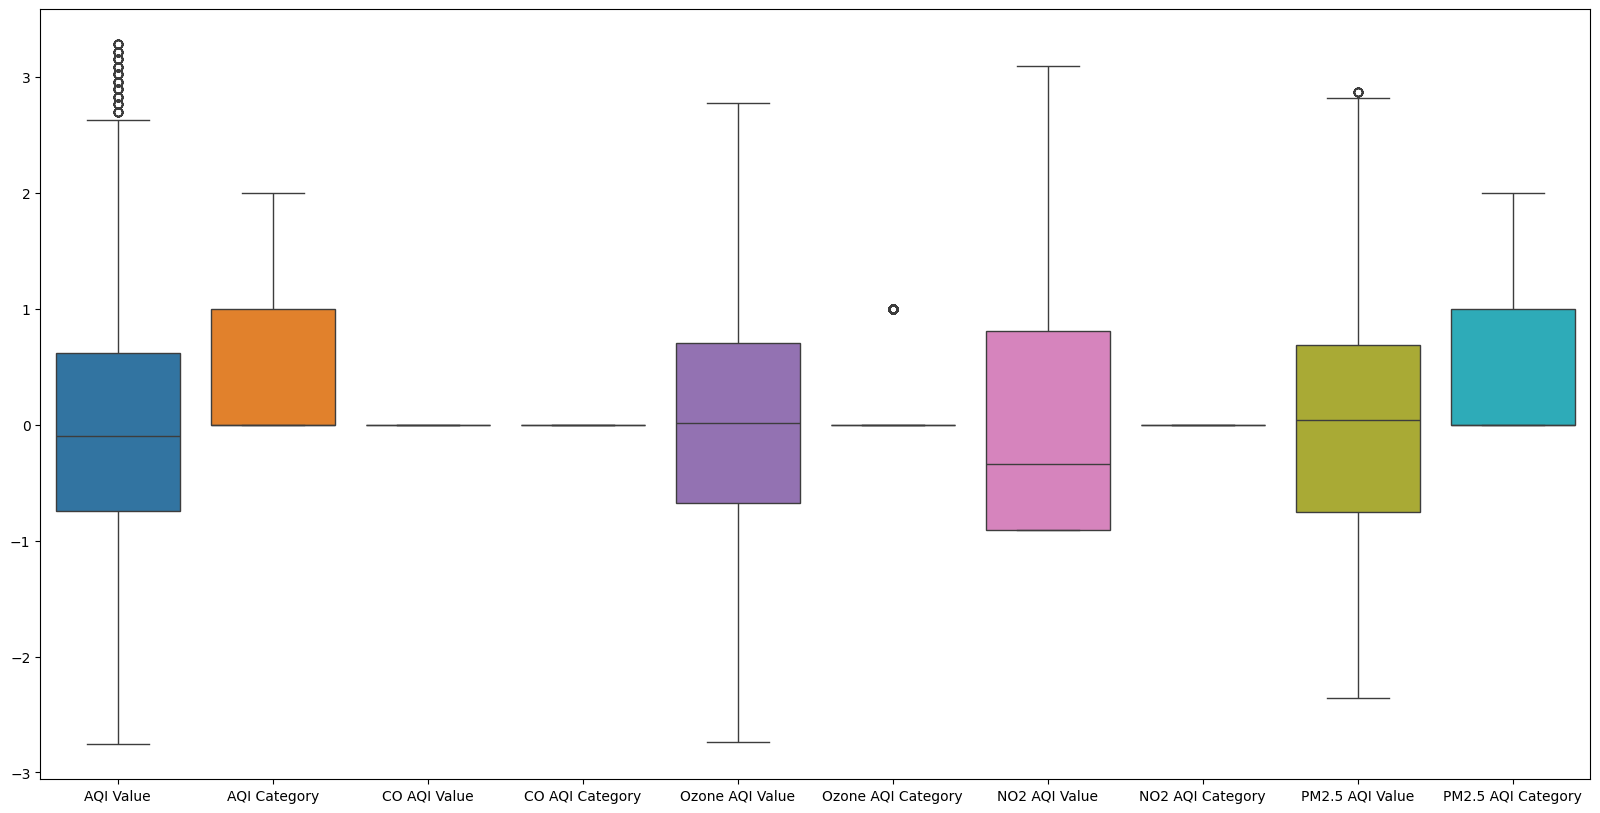

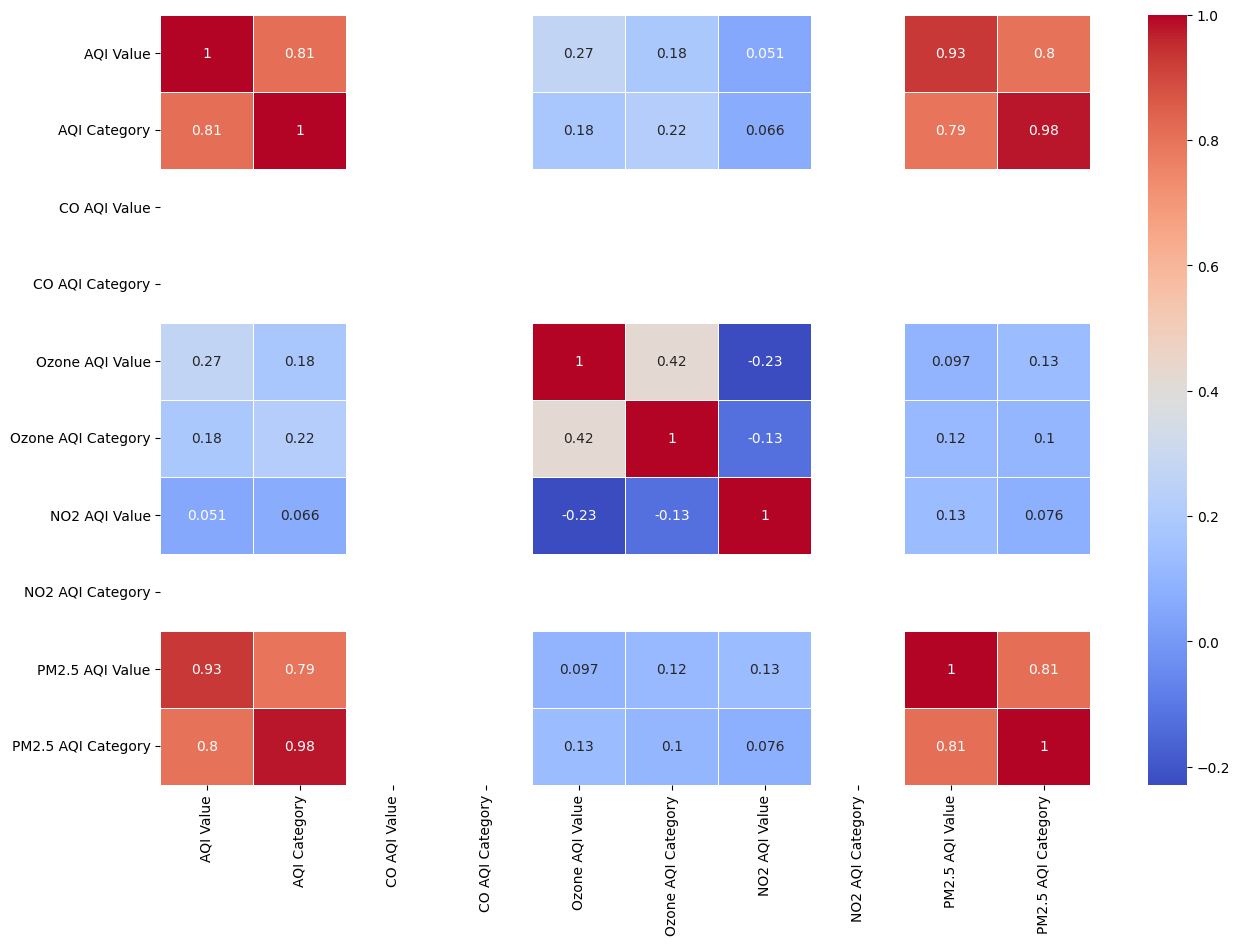

No 'date' column found for time series analysis.


In [ ]:
# -*- coding: utf-8 -*-
"""Untitled0.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1o0PTpvXoR9s8s2-hhXriFQWmOFiHsy_U
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

file_name = 'Cleaned.csv'
df = pd.read_csv(file_name)

descriptive_stats = df.describe(include='all')
mode_values = df.mode().iloc[0]
numeric_cols = df.select_dtypes(include=[np.number]).columns
std_deviation = df[numeric_cols].std()

print("Descriptive Statistics:\n", descriptive_stats)
print("\nMode Values:\n", mode_values)
print("\nStandard Deviation:\n", std_deviation)

df[numeric_cols].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numeric_cols])
plt.show()

plt.figure(figsize=(15, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Plotting the trend of AQI value over time
    plt.figure(figsize=(15, 8))
    df['AQI value'].plot()
    plt.title('Trend of AQI value over time')
    plt.xlabel('Date')
    plt.ylabel('AQI value')
    plt.show()

    # Seasonal decomposition (only works if the dataset has a datetime index)
    from statsmodels.tsa.seasonal import seasonal_decompose

    decomposition = seasonal_decompose(df['AQI value'], model='additive', period=365)
    fig = decomposition.plot()
    fig.set_size_inches(15, 8)
    plt.show()
else:
    print("No 'date' column found for time series analysis.")

# New section